In [1]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import json


The given dataset is in .ndjson extension.

In [2]:
data_url = '../input/realdonaldtrump.ndjson'
records = map(json.loads, open(data_url))
df = pd.DataFrame.from_records(records)

In [3]:
df.shape

(40241, 34)

There are 40241 tweets available from Trump in this Dataset.

In [4]:
df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,possibly_sensitive,extended_entities,quoted_status,quoted_status_id,quoted_status_id_str,retweeted_status,withheld_copyright,withheld_in_countries,withheld_scope,scopes
0,None,None,Mon May 04 18:54:25 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",850,False,None,1698308935,1698308935,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,Tue May 05 01:00:10 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",282,False,None,1701461182,1701461182,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,Fri May 08 13:38:08 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",16,False,None,1737479987,1737479987,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,Fri May 08 20:40:15 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",28,False,None,1741160716,1741160716,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,Tue May 12 14:07:28 +0000 2009,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",1950,False,None,1773561338,1773561338,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'favorite_count', 'favorited', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'retrieved_utc', 'retweet_count', 'retweeted', 'source', 'text',
       'truncated', 'user', 'possibly_sensitive', 'extended_entities',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweeted_status', 'withheld_copyright', 'withheld_in_countries',
       'withheld_scope', 'scopes'],
      dtype='object')

A preview on how the table look like. Since the author didn't specify the meaning on feature columns provided, I will be exploring some key column within this EDA.

In [6]:
df.isnull().sum()

contributors                 40241
coordinates                  37826
created_at                       0
entities                         0
favorite_count                   0
favorited                        0
geo                          37826
id                               0
id_str                           0
in_reply_to_screen_name      37368
in_reply_to_status_id        37848
in_reply_to_status_id_str    37848
in_reply_to_user_id          37368
in_reply_to_user_id_str      37368
is_quote_status                  0
lang                             0
place                        37250
retrieved_utc                    0
retweet_count                    0
retweeted                        0
source                           0
text                             0
truncated                        0
user                             0
possibly_sensitive           30818
extended_entities            38038
quoted_status                39747
quoted_status_id             39599
quoted_status_id_str

There are a lot of missing data is some of the columns. Main informations about tweets are present, such as text, retweet counts, favourite count and the date tweets are created.

In [7]:
df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,retrieved_utc,retweet_count,quoted_status_id
count,40241.000000,4.024100e+04,2.393000e+03,2.873000e+03,4.024100e+04,40241.000000,6.420000e+02
mean,17699.030814,5.850965e+17,4.152022e+17,2.859287e+14,1.562867e+09,4956.459134,9.164181e+17
std,37034.338358,2.791762e+17,2.572739e+17,1.532587e+16,4.381571e+01,9655.247594,1.942676e+17
min,0.000000,1.698309e+09,1.288894e+17,7.425000e+03,1.562867e+09,0.000000,3.009181e+16
25%,21.000000,3.517832e+17,2.920414e+17,2.511377e+07,1.562867e+09,23.000000,7.118302e+17
50%,114.000000,5.534068e+17,3.151636e+17,1.727381e+08,1.562867e+09,246.000000,9.706234e+17
75%,9468.000000,7.619873e+17,3.651525e+17,4.518238e+08,1.562867e+09,6141.000000,1.097188e+18
max,576394.000000,1.149346e+18,1.149346e+18,8.214724e+17,1.562867e+09,321390.000000,1.149093e+18


In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])


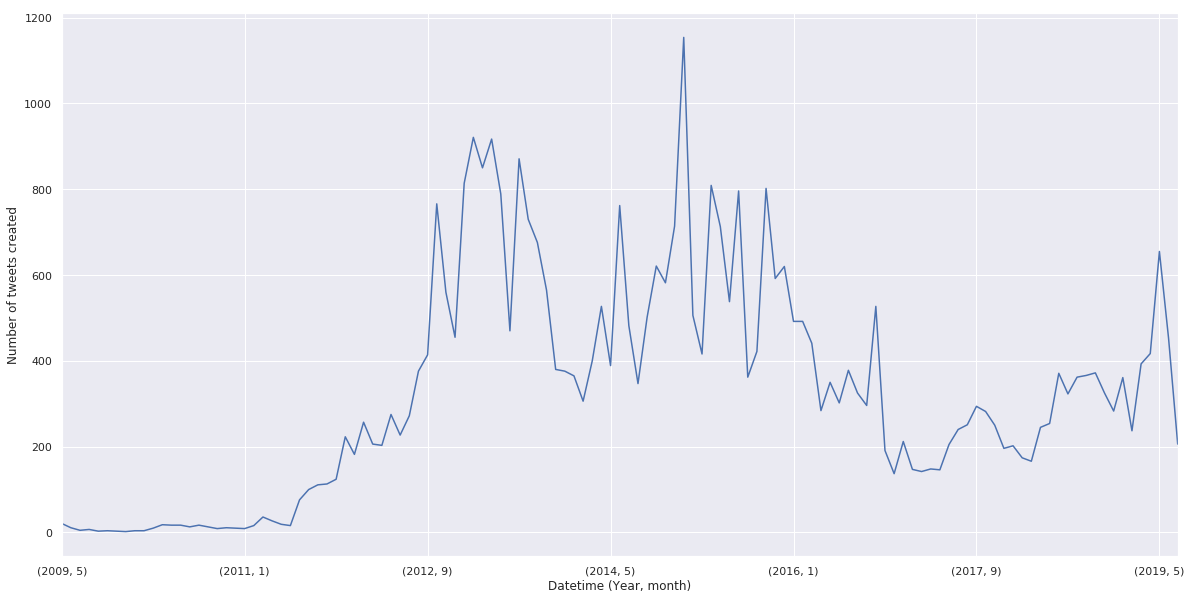

In [9]:
plt.figure(figsize=(20,10))
df.groupby([df['created_at'].dt.year, df['created_at'].dt.month])['created_at'].count().plot()
plt.xlabel('Datetime (Year, month)')
plt.ylabel('Number of tweets created')
plt.show()

A plot on the number of tweets created on Donald Trump's Twitter account throughout 2009-2019. The number of tweets fluctuate frequently and has a peak around 2015, which is at the time before the 2016 US presidental election. After the presidential election tweeting activity seem plummeted significantly. It's not until the late 2017 that the amount of tweeting activity gradually increase.

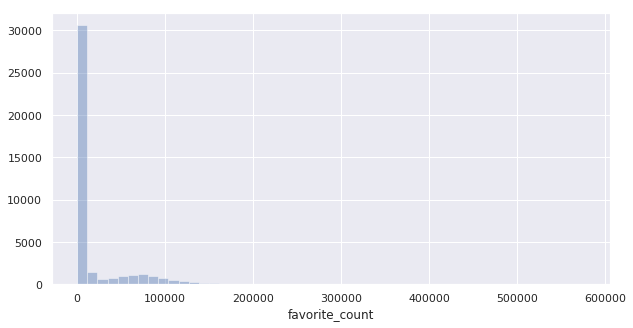

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['favorite_count'], kde=False)
plt.show()

Roughly 70% of the tweets in the dataset seems to have a very low favourite count,and tweets with more favourite counts are less frequent.

In [11]:
df[df['favorite_count'] <= 100].iloc[:10].text.values

array(['Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!',
       'New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e',
       'Miss USA Tara Conner will not be fired - "I\'ve always been a believer in second chances." says Donald Trump',
       'Listen to an interview with Donald Trump discussing his new book, Think Like A Champion: http://tinyurl.com/qs24vl',
       '"Strive for wholeness and keep your sense of wonder intact." --Donald J. Trump http://tinyurl.com/pqpfvm',
       'Enter the "Think Like A Champion" signed book and keychain contest:\nhttp://www.trumpthinklikeachampion.com/contest/',
       '"When the achiever achieves, it\'s not a plateau, it’s a beginning." --Donald J. Trump http://tinyurl.com/pqpfvm',
       '"Don’t be afraid of being unique - it\'s like being afraid of your best self." --Donald J. Trump http://tinyurl.com/pqpfvm',
       '"...these

In [12]:
df[df['favorite_count'] >= 100000].iloc[:10].text.values

array(['I have never seen a thin person drinking  Diet Coke.',
       'The electoral college is a disaster for a democracy.',
       "Sorry losers and haters, but my I.Q. is one of the highest -and you all know it! Please don't feel so stupid or insecure,it's not your fault",
       'Be prepared, there is a small chance that our horrendous leadership could unknowingly lead us into World War III.',
       'Are you allowed to impeach a president for gross incompetence?',
       'Happy #CincoDeMayo! The best taco bowls are made in Trump Tower Grill. I love Hispanics! https://t.co/ufoTeQd8yA https://t.co/k01Mc6CuDI',
       'How long did it take your staff of 823 people to think that up--and where are your 33,000 emails that you deleted? https://t.co/gECLNtQizQ',
       'Such a great honor to be the Republican Nominee for President of the United States. I will work hard and never let you down! AMERICA FIRST!',
       "The media is spending more time doing a forensic analysis of Melania's s

In [13]:
print("Maximum favourite count is {}.".format(df['favorite_count'].max()))
df.iloc[df['favorite_count'].idxmax()].text

Maximum favourite count is 576394.


'Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before'

/opt/conda/lib/python3.6/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


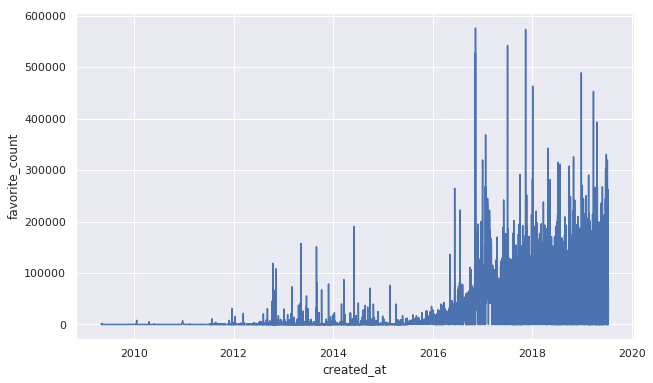

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot( 'created_at', 'favorite_count',data=df)
plt.show()

In [15]:
df['source'].iloc[:5].values

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [16]:
df['source'].unique()

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://beta.twitlonger.com" rel="nofollow">TwitLonger Beta</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://www.twitlonger.com" rel="nofollow">Twitlonger</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://dev.twitter.com/docs/tfw" rel="nofollow">Twitter for Websites</a>',
       '<a href="http://www.twitter.com" rel="nofollow">Twitter for BlackBerry</a>',

In [17]:
import re
df['source'] = df['source'].str.replace(r'<[^<]+?>','')
df['source'].unique()

array(['Twitter Web Client', 'TwitLonger Beta', 'TweetDeck', 'Facebook',
       'Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'Instagram', 'Twitlonger', 'Vine - Make a Scene',
       'Twitter for Websites', 'Twitter for BlackBerry',
       'Neatly For BlackBerry 10', 'Periscope', 'Twitter QandA',
       'Twitter Mirror for iPad', 'Twitter Ads', 'Twitter for iPad',
       'Twitter Media Studio'], dtype=object)

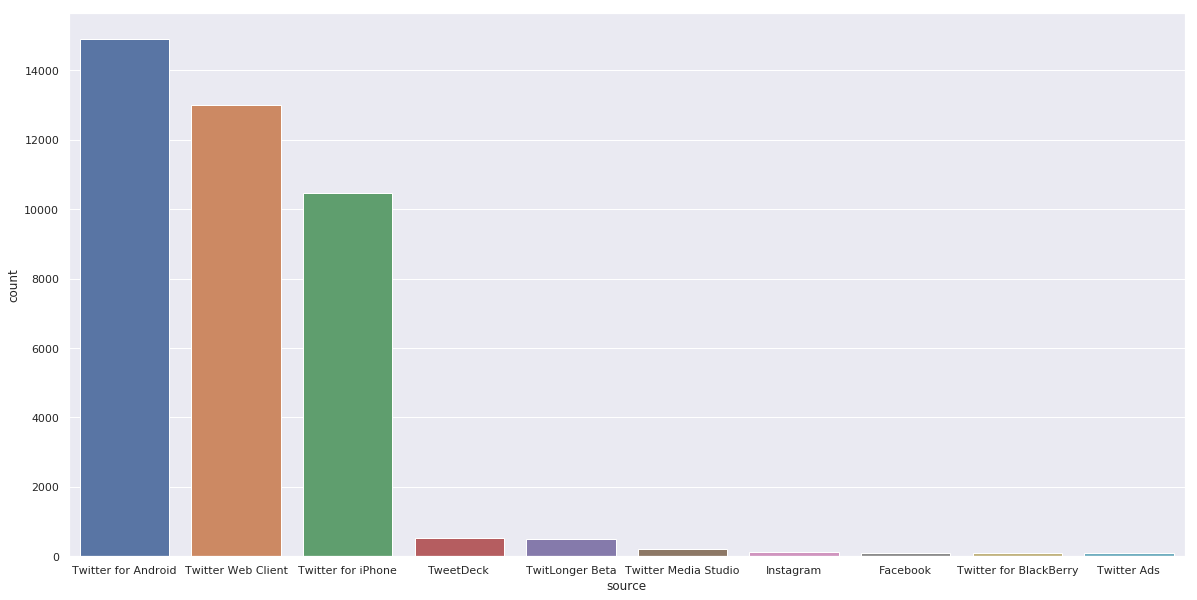

In [18]:
plt.figure(figsize=(20,10))
sns.countplot('source',data=df, order=df['source'].value_counts().iloc[:10].index)

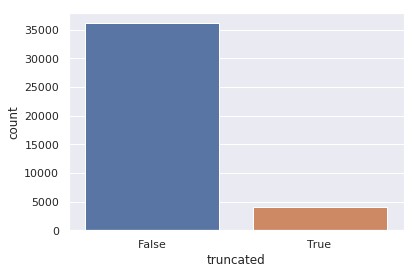

In [19]:
ax = sns.countplot(x="truncated",data=df)

In [20]:
list(df[df['truncated'] == True].iloc[:7].text.values)

['Thank you High Point, NC! I will fight for every neglected part of this nation &amp; I will fight to bring us together… https://t.co/DSaUpSptBz',
 'Thank you Kenansville, North Carolina! Remember- on November 8th, that special interest gravy train is coming to a… https://t.co/AysJRMzvKw',
 'It is a MOVEMENT - not a campaign. Leaving the past behind, changing our future. Together, we will MAKE AMERICA SAF… https://t.co/Lt2L3NKzyi',
 'Thank you Toledo, Ohio! It is so important for you to get out and VOTE on November 8, 2016! Lets MAKE AMERICA SAFE… https://t.co/MQdp4GgLIE',
 'Great new polls! Thank you Nevada, North Carolina &amp; Ohio. Join the MOVEMENT today &amp; lets #MAGA!… https://t.co/Y8Sb8MNyXA',
 "Tomorrow's the day! Knock on doors and make calls with us on National Day of Action! #TrumpTrain #MAGA… https://t.co/05NY0wJHkL",
 'Join me in Roanoke, Virginia tomorrow at the Berglund Center- Coliseum ~ 6pm! Tickets available at:… https://t.co/bnEE6NX41Z']

In [21]:
list(df[df['truncated'] == True].iloc[:7].text.values)[5]

"Tomorrow's the day! Knock on doors and make calls with us on National Day of Action! #TrumpTrain #MAGA… https://t.co/05NY0wJHkL"

In [22]:
df = df[df['truncated'] == False]

In [23]:
text = list(df['text'].values)

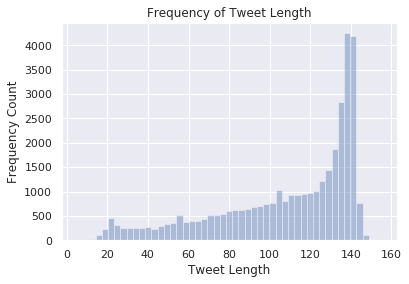

In [24]:
ax = sns.distplot([len(tweet) for tweet in text], kde=False)
ax.set_title('Frequency of Tweet Length')
ax.set_xlabel('Tweet Length')
ax.set_ylabel('Frequency Count')
plt.show()

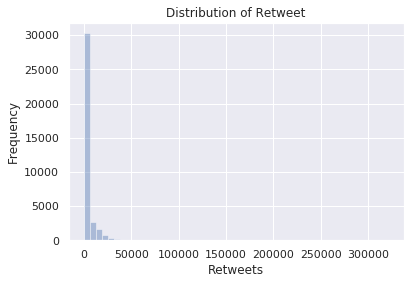

In [25]:
ax = sns.distplot(df['retweet_count'], kde=False)
ax.set_title('Distribution of Retweet')
ax.set_xlabel('Retweets')
ax.set_ylabel('Frequency')
plt.show()

In [26]:
def plotCounter(arr, xlabel, ylabel, rotation, fontsize, figsize):
    val,name = [],[]
    for idx,i in enumerate(arr):
        val.append(i[1])
        name.append(i[0])
    plt.figure(figsize=figsize)
    sns.barplot(x=name, y=val)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, horizontalalignment='right', fontsize=fontsize)
    plt.show()

In [27]:
word_c = Counter()
hashtags, parse_tweets = [], []

for tweet in text:
    result = re.sub(r"http\S+", "", tweet.lower())
    for i in result.split():
        if i.startswith("#"):
            if i.endswith("\""):
                hashtags.append(i[:-1])
            else:
                hashtags.append(i)
    parse_tweets.append(word_tokenize(result))
    for word in parse_tweets[-1]:
        word_c[word] += 1


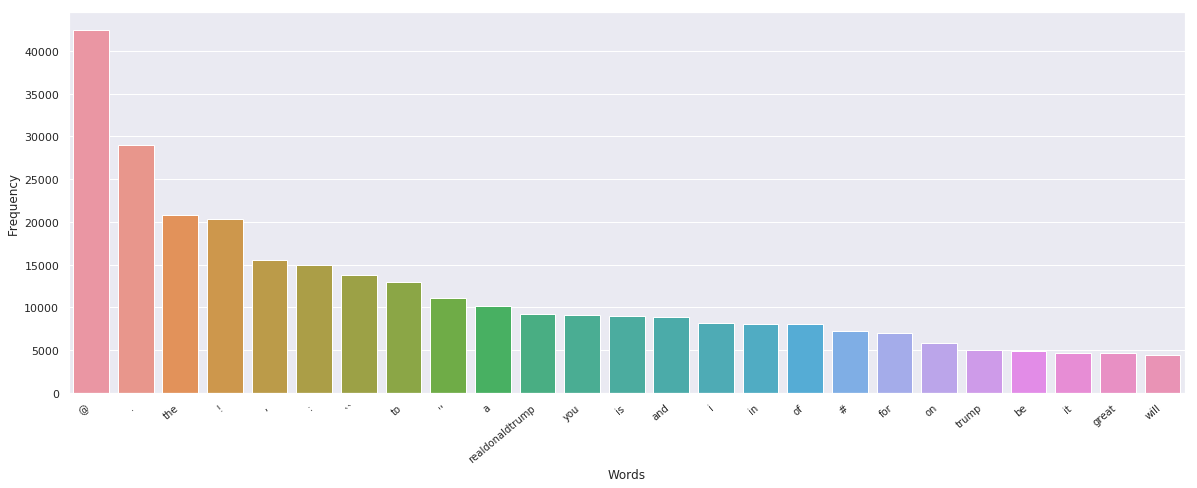

In [28]:
plotCounter(word_c.most_common(25),'Words','Frequency',40,10, (20,7))

In [29]:
word_c = Counter()
punc = string.punctuation
stopwords = stopwords.words('english') 

for tweet in parse_tweets:
    for w in tweet:
        if w[0] not in punc and w not in stopwords:
            word_c[w] += 1

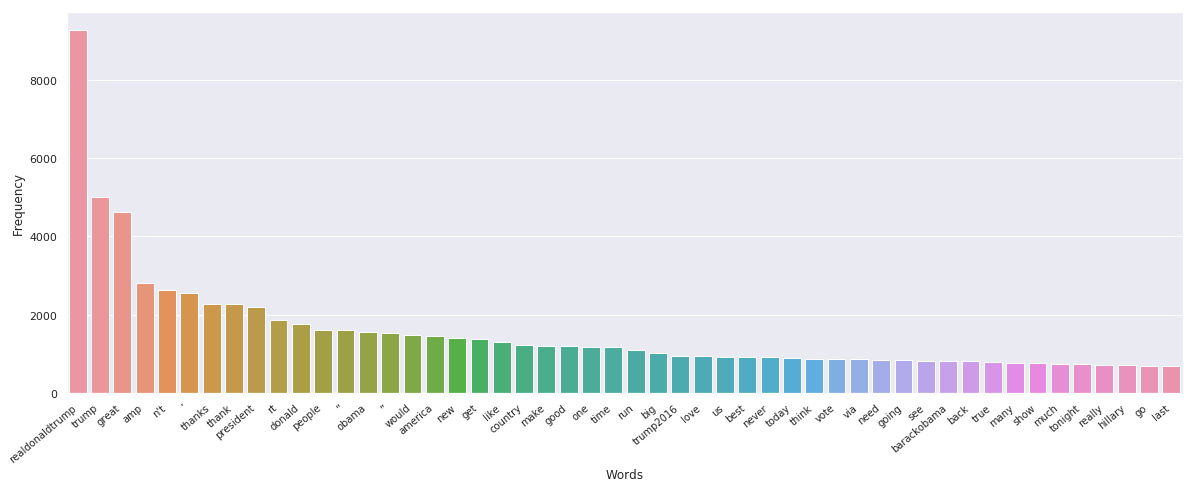

In [30]:
plotCounter(word_c.most_common(50),'Words','Frequency',40,10,(20,7))

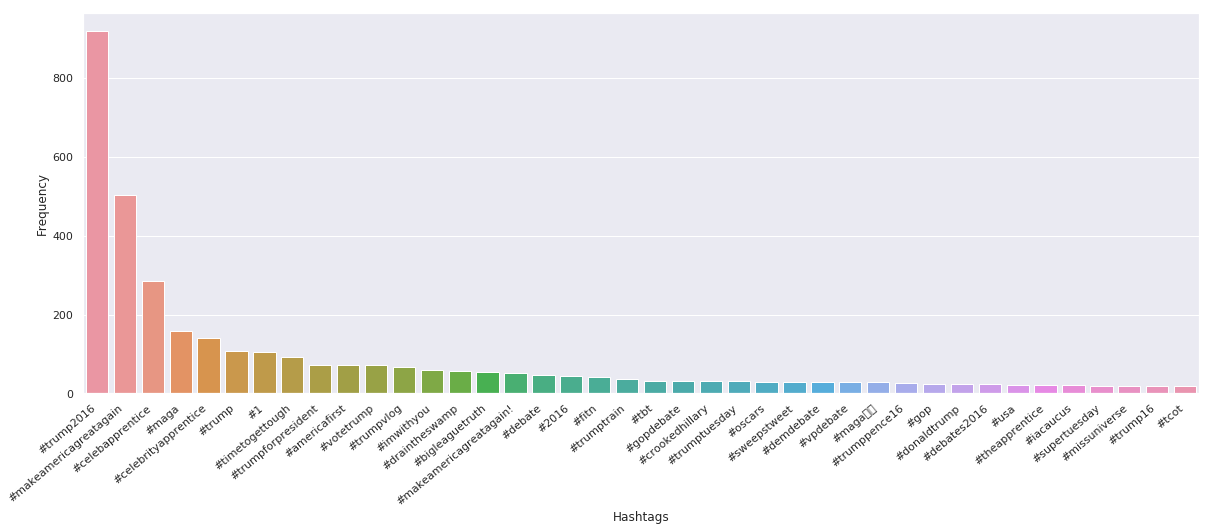

In [31]:

c = Counter(hashtags)
plotCounter(c.most_common(40),'Hashtags','Frequency',40,11,(20,7))


In [32]:

mask = "https://png2.cleanpng.com/sh/caef982a5e1abd76c6797448cef3b8f1/L0KzQYi4UsE4N2k7S5GAYUO5cYa8gcdiP2YATZC8Mke7SIO6WcE2OWQ6S6ICMUS4QIK9TwBvbz==/5a36a55a7a7595.3278823915135307145016.png"